In [75]:
import pandas as pd
titanic_encoded = pd.read_csv("train.csv")
print(titanic_encoded.head())
print(titanic_encoded.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [76]:
titanic_encoded.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [77]:
titanic_encoded.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
titanic_encoded.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
titanic_encoded['Cabin'].fillna('Deck', inplace = True)
titanic_encoded['Age'].fillna(titanic_encoded['Age'].median(), inplace = True)
titanic_encoded['Embarked'].fillna('Unknown', inplace = True)
titanic_encoded.head()

/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_10991/630184910.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_encoded['Cabin'].fillna('Deck', inplace = True)
/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_10991/630184910.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Deck,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Deck,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Deck,S


In [80]:
titanic_encoded.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [81]:
titanic_encoded['Title'] = titanic_encoded['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_encoded['FamilySize'] = titanic_encoded['SibSp'] + titanic_encoded['Parch'] + 1

titanic_encoded.head()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_10991/2707410993.py:1: SyntaxWarning: invalid escape sequence '\.'
  titanic_encoded['Title'] = titanic_encoded['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Deck,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Deck,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Deck,S,Mr,1


In [82]:
titanic_encoded['Title'].nunique()
titanic_encoded['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [83]:
titanic_encoded['satndart_title'] = titanic_encoded['Title'].map({'Mlle': 'Miss', 'Mme':'Mrs', 'Ms': 'Miss', 'Don' : 'Rare', 'Rev' : 'Rare',
'Dr' : 'Rare', 'Major' : 'Rare', 'Lady' : 'Rare', 'Sir' : 'Rare', 'Col' : 'Rare', 'Capt' : 'Rare', 'Countess' : 'Rare', 'Jonkheer' : 'Rare', 'Mr': 'Mr', 
'Mrs' : 'Mrs', 'Miss' : 'Miss', 'Master' : 'Master'})
titanic_encoded.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,satndart_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Deck,S,Mr,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Deck,S,Miss,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Deck,S,Mr,1,Mr


In [84]:
titanic_encoded['Sex'].nunique()
titanic_encoded['Sex'].unique()

array(['male', 'female', 'fe male', 'M', 'femail', 'F', 'mail', 'ma le',
       'Male', 'Female'], dtype=object)

In [85]:
sex_clean = {
    'M':'male', 'male':'male', 'mail':'male',
    'F':'female', 'female':'female', 'femail':'female', 'Male': 'male', 'fe male': 'female', 'ma le':'female', 'Female':'female'
}

titanic_encoded['Sex'].replace(sex_clean, inplace = True)
   
titanic_encoded['Sex'].unique()

/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_10991/3812651472.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_encoded['Sex'].replace(sex_clean, inplace = True)


array(['male', 'female'], dtype=object)

In [86]:
titanic_encoded['sex_code'] = titanic_encoded['Sex'].map({'male': 1, 'female': 0})
titanic_encoded = pd.get_dummies(titanic_encoded, columns=['Embarked', 'satndart_title'], drop_first=True)

titanic_encoded.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,FamilySize,sex_code,Embarked_Q,Embarked_S,Embarked_Unknown,satndart_title_Miss,satndart_title_Mr,satndart_title_Mrs,satndart_title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr,2,1,False,True,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Mrs,2,0,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Miss,1,0,False,True,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Mrs,2,0,False,True,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Mr,1,1,False,True,False,False,True,False,False


In [87]:
titanic_encoded[['Age', 'FamilySize', 'Fare']].describe()

,Age,FamilySize,Fare
count,891.000000,891.000000,891.000000
mean,29.361582,1.904602,32.204208
std,13.019697,1.613459,49.693429
min,0.420000,1.000000,0.000000
25%,22.000000,1.000000,7.910400
50%,28.000000,1.000000,14.454200
75%,35.000000,2.000000,31.000000
max,80.000000,11.000000,512.329200


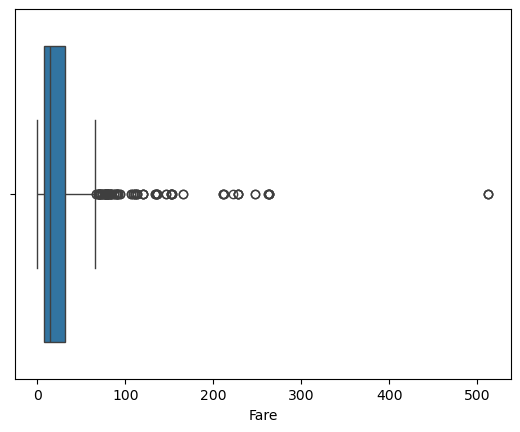

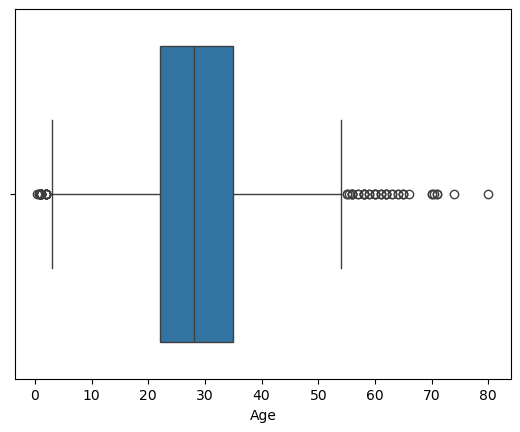

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=titanic_encoded['Fare'])
plt.show()

sns.boxplot(x=titanic_encoded['Age'])
plt.show()

In [89]:
Q1 = titanic_encoded['Fare'].quantile(0.25)
Q3 = titanic_encoded['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = titanic_encoded[(titanic_encoded['Fare'] < lower) | (titanic_encoded['Fare'] > upper)]
print(len(outliers))

116


In [90]:
Q1 = titanic_encoded['Age'].quantile(0.25)
Q3 = titanic_encoded['Age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = titanic_encoded[(titanic_encoded['Age'] < lower) | (titanic_encoded['Age'] > upper)]
print(len(outliers))

66


In [91]:
titanic_encoded['Fare_capped'] = titanic_encoded['Fare'].clip(lower, upper)
titanic_encoded['Age_capped'] = titanic_encoded['Age'].clip(lower, upper)

In [92]:
titanic_encoded[['Age_capped', 'Fare_capped']].describe()


,Age_capped,Fare_capped
count,891.000000,891.000000
mean,29.039282,22.536812
std,12.072074,17.432027
min,2.500000,2.500000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,54.500000,54.500000


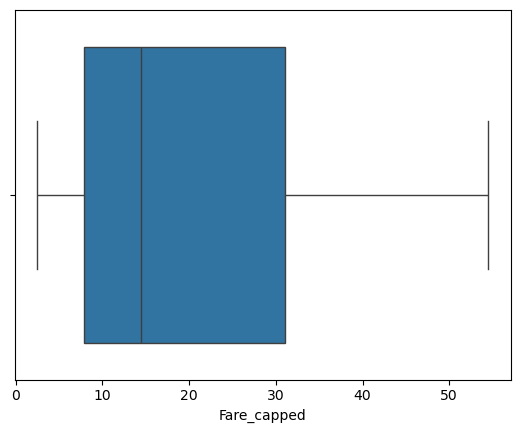

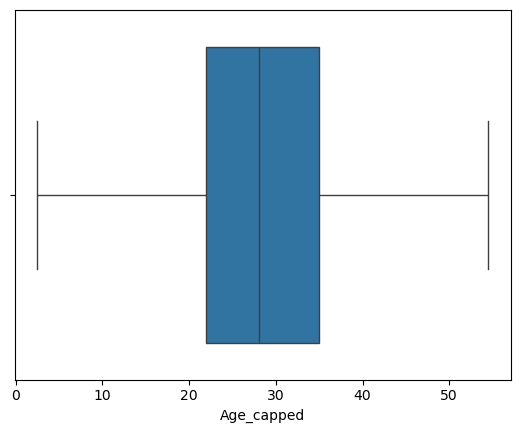

In [93]:
sns.boxplot(x=titanic_encoded['Fare_capped'])
plt.show()

sns.boxplot(x=titanic_encoded['Age_capped'])
plt.show()

In [94]:
pip install --upgrade scipy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [95]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

titanic_encoded['Age_filled']  = titanic_encoded['Age'].fillna(titanic_encoded['Age'].median())
titanic_encoded['Fare_filled'] = titanic_encoded['Fare'].fillna(titanic_encoded['Fare'].median())

std_scaler = StandardScaler()
titanic_encoded['Age_scaled'] = std_scaler.fit_transform(titanic_encoded[['Age_filled']])

mm_scaler = MinMaxScaler()
titanic_encoded['Fare_scaled'] = mm_scaler.fit_transform(titanic_encoded[['Fare_filled']])

titanic_encoded[['Age_scaled','Fare_scaled']].describe()

,Age_scaled,Fare_scaled
count,8.910000e+02,891.000000
mean,2.272780e-16,0.062858
std,1.000562e+00,0.096995
min,-2.224156e+00,0.000000
25%,-5.657365e-01,0.015440
50%,-1.046374e-01,0.028213
75%,4.333115e-01,0.060508
max,3.891554e+00,1.000000


In [97]:
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']

titanic_encoded['AgeGroup'] = pd.cut(titanic_encoded['Age_filled'], bins=bins, labels=labels)
titanic_encoded = pd.get_dummies(titanic_encoded, columns=['AgeGroup'], drop_first=True)

In [98]:
titanic_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,satndart_title_Rare,Fare_capped,Age_capped,Age_filled,Fare_filled,Age_scaled,Fare_scaled,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,False,7.250,22.0,22.0,7.2500,-0.565736,0.014151,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,False,54.500,38.0,38.0,71.2833,0.663861,0.139136,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,False,7.925,26.0,26.0,7.9250,-0.258337,0.015469,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,False,53.100,35.0,35.0,53.1000,0.433312,0.103644,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,False,8.050,35.0,35.0,8.0500,0.433312,0.015713,False,True,False
